# Spotify Genre Classification 

## Getting the Data - Scraping and Spotify API

### explaining the functions of API:
the target : to create a dataFrame that contains the information from the billabord charts and from spotify. the information from spotify is the id of each song that is in the billaboard chart.

We get the id of the song,which is the connection between the billabord info and the spotify info (we take each song and artist name from the billabord chart and search for the specific song id in order to get the features that we want to check on each song, in order to classify which song is a hit or not , i.e. which song is popular and which isn't (by the popularity column, which we turned from numeric to catagorial (yes/no).

In addition to getting the id - with get_id_of_songs() function, that uses other functions : get_key(val) and find_id(song,result), this function also returns the uri , the song features that we will use in the dataFrame and also info about the artist ( with find_artist_info(result) ) , which includes the 'popularity' feature , which is out target variable.  

In [3]:
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [4]:
def scrape(url):
    page = urlopen(url)
    soup = BeautifulSoup(page)
    right_table = soup.find('table', class_='wikitable sortable')
    #Generate lists
    A=[]
    B=[]
    C=[]
    for row in right_table.findAll("tr"):
        cells = row.findAll('td')
        if len(cells)==3: #Only extract table body not heading
            A.append(cells[0].find(text=True))
            B.append(cells[1].find('a').find(text=True))
            C.append(cells[2].find('a').find(text=True))
    df = pd.DataFrame(A,columns=['No.'])
    df['Title'] = B
    df['Artist(s)'] = C
    return df

In [5]:
url0 = 'https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2010'
url201 = 'https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_201'
url200 = 'https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_200'

df = scrape(url0)
for i in range(1,10):
    print(url201+str(i))
    df_to_append = scrape(url201+str(i))
    df = df.append(df_to_append)
for i in range(0,10):
    print(url200+str(i))
    try:
        df_to_append = scrape(url200+str(i))
        df = df.append(df_to_append)
    except:
        print("skip")
df

NameError: name 'pd' is not defined

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import requests 
import scipy.stats as stats
import datetime
import base64
clientid = '4d7f3ed374354cbf848b72bc270abedd'
secretid = '7c9935d59cbc417e8ac74ad8d7e06a6e'
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2019')
print(f'Total tables: {len(table_MN)}')
df1 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2018')
df2 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2017')
df3 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2016')
df4 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2015')
df5 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2014')
df6 = table_MN[0]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2013')
df7 = table_MN[1]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2012')
df8 = table_MN[1]
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2011')
df9 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2010')
# df10 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2009')
# df11 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2008')
# df12 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2007')
# df13 = table_MN[0]
# table_MN = pd.read_html('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2006')
# df14 = table_MN[0]

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
#           ,df10 ,df11 ,df12 ,df13 ,df14]


## todo: get more data, and really scrape this.
all_songs_list = pd.concat(frames)
all_songs_list = df

Total tables: 2


NameError: name 'df' is not defined

In [ ]:
all_songs_list

In [ ]:
# sp.search("lsdjlk asfklfafas", limit=1,type='track')

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
cid = "3b41c863d85746899b1bd17a39149f8e"
secret = "631b736a77d545e4a822bea470435cea"

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [7]:
# getting the entity of the song - it has features such as the rank, artist name and track name from the wikepdia billabord pages
# then, we will use this in order to find the spotify data
# song_entity is a dictionary that holds the values i wrote above and also have some of the tracks' indormation
# song_results - list, keeping all the songs' entities

import re

song_results = []
for index, row in all_songs_list.iterrows():
    song_rank = row['No.']
    artist_original_name = row['Artist(s)']
    # taking care of cases where there are multiple artists in a song
    artist_names = re.split('featuring | and | ,',artist_original_name)
    artist_names.append(artist_original_name)
    #taking care of cases where the band name has the word 'and'
    for name in artist_names:
        query = "track:"+row['Title']+" artist:"+name
        query = query.replace('"','')
        search_result = sp.search(query, limit=1,type='track')
        if len(search_result['tracks']['items']) != 0:
            song_entity ={'rank':song_rank,'result':search_result}
            song_results.append(song_entity)
            break
#         song_queries.append(query)

NameError: name 'sp' is not defined

In [8]:
song_entity

NameError: name 'song_entity' is not defined

In [9]:
song_results

[]

<!-- #### get the artist/band name , in order to search for the song title in the find_id() function -->

In [10]:
#useless?

In [11]:
# # so we will get an additinal info about the artist and the song - genre , popularity and etc.
# def find_artist_info(result):
#     for data in result['tracks']['items']:
#         for key,value in data.items():
#                 if (key=='artists'): 
#                       return (value[0]['id'])  


In [12]:
#find_artist_info(result)

In [13]:
# getting the spotify features using song_result
def get_song_features(song_entity):
    search_result = song_entity['result']
    track_uri = search_result['tracks']['items'][0]['uri']
    #additional features for what we've got so far using the track_uri
    track_features = sp.audio_features(track_uri)[0]
    artist_id = search_result['tracks']['items'][0]['artists'][0]['id']
    artist_info = sp.artist(artist_id)
    artist_popularity = artist_info['popularity']
    artist_genre = artist_info['genres'][0]
    
    features = track_features
    features['genre'] = artist_genre
    features['popularity'] = artist_popularity
    features['rank'] = song_entity['rank']

    return features

In [14]:


# creating a data frame uding song_entities.

def get_songs_df(song_entities):
    song_list = []
    for ent in song_entities:
        try:
            # adding each features of a song to the list
            song_features = get_song_features(ent)
            song_list.append(song_features)
        except:
            print(ent['result'])
            print("song was not found!")
    
    return pd.DataFrame(song_list)

# Introduction to the problem

### What is Classification?

A classification algorithm takes a dataset of labelled examples as inputs to produce a model that can take unlabeled new data and automatically assign labels to the unlabeled example.

If the classification problem has a set of two labels (for instance “spam” or “not spam”) then it is a binary classification problem. Multi-class classification is a problem where the number of labels within the set is three or greater. 

The problem that we are looking at is a multi-class as there are many genres within the set.

### our independent features/variables: 

#### A. from spotify API track info:

#### B. from spotify API artist info:

#### C. from billaboard charts' scraping: 
     rank- song position
     

## What is the target column?
our target column (dependent feature): genre
    
genre is the music type which the song is accosiated to
in the data aquisition process, we only took the rifst genre the song is accosiated to.

our aprior ideas:
   
   * the features 'danceability', 'energy', loudness ,instrumentalness ,speechiness, liveness', pop and tempo have high        correlation to the genre feature, so they are good features to use in order to classify the songs' genre.
    this is due to the fact that those features are linked very strongl to specific genres.
    
for example, a pop song has a big likelihood to have high danceability, energy, loudness and pop (popularity), whereas a rock song has a big likelihood to have high loudness and instrumentalness, in comparison to a country song that is likely to have low loudness and high acousticness	.

* the rank feature may be helpful to classify the songs' genre since we know that most of the song that has high ranking are classified as pop songs or rap/hip hop songs.


#  getting to know the data

In [18]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#for preprocessing part
from scipy import stats

ModuleNotFoundError: No module named 'plotly'

In [16]:
#DataFrame of all our songs


##########################################################
songs_df = get_songs_df(song_results)

In [19]:
# songs_df.to_csv("C:\\Users\\User\\Desktop\\final-project\\realProject\\songs.csv")

In [20]:
songs_df = pd.read_csv("songs.csv")

In [21]:
songs_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,popularity,rank
0,0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,...,audio_features,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,dance pop,82,1
1,1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,...,audio_features,11EX5yhxr9Ihl3IN1asrfK,spotify:track:11EX5yhxr9Ihl3IN1asrfK,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4,contemporary country,72,2
2,2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,...,audio_features,4HlFJV71xXKIGcU3kRyttv,spotify:track:4HlFJV71xXKIGcU3kRyttv,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4,dance pop,77,3
3,3,0.788,0.753,0,-3.710,1,0.0536,0.00380,0.000000,0.1800,...,audio_features,6KOEK6SeCEZOQkLj5M1PxH,spotify:track:6KOEK6SeCEZOQkLj5M1PxH,https://api.spotify.com/v1/tracks/6KOEK6SeCEZO...,https://api.spotify.com/v1/audio-analysis/6KOE...,234653,4,dance pop,88,4
4,4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,...,audio_features,1bM50INir8voAkVoKuvEUI,spotify:track:1bM50INir8voAkVoKuvEUI,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4,atl hip hop,83,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,0.777,0.820,1,-3.211,0,0.0471,0.00505,0.000026,0.1420,...,audio_features,5myYDbAurm1CW038qd4gL2,spotify:track:5myYDbAurm1CW038qd4gL2,https://api.spotify.com/v1/tracks/5myYDbAurm1C...,https://api.spotify.com/v1/audio-analysis/5myY...,208133,4,dance pop,41,96
1599,1599,0.738,0.983,5,-4.374,0,0.0852,0.03760,0.000006,0.1830,...,audio_features,383B8ksM58jbV3HbiRJo0K,spotify:track:383B8ksM58jbV3HbiRJo0K,https://api.spotify.com/v1/tracks/383B8ksM58jb...,https://api.spotify.com/v1/audio-analysis/383B...,235760,4,reggae fusion,59,97
1600,1600,0.610,0.431,0,-6.730,1,0.2940,0.03000,0.000000,0.0990,...,audio_features,5lrOsw7J8R7shum7A4j36t,spotify:track:5lrOsw7J8R7shum7A4j36t,https://api.spotify.com/v1/tracks/5lrOsw7J8R7s...,https://api.spotify.com/v1/audio-analysis/5lrO...,215973,3,gangster rap,62,98
1601,1601,0.563,0.402,9,-10.496,1,0.0668,0.25200,0.000002,0.0886,...,audio_features,22NLm3IIR9NLG0cUYtmHMW,spotify:track:22NLm3IIR9NLG0cUYtmHMW,https://api.spotify.com/v1/tracks/22NLm3IIR9NL...,https://api.spotify.com/v1/audio-analysis/22NL...,310520,4,contemporary r&b,62,99


#  preprocessing of the data

In [22]:
songs_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,popularity,rank
0,0,0.755,0.837,2,-2.718,0,0.1420,0.0991,0.000000,0.2890,...,audio_features,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,dance pop,82,1
1,1,0.587,0.622,4,-5.535,1,0.0303,0.0927,0.000636,0.2000,...,audio_features,11EX5yhxr9Ihl3IN1asrfK,spotify:track:11EX5yhxr9Ihl3IN1asrfK,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4,contemporary country,72,2
2,2,0.673,0.886,1,-4.440,0,0.0431,0.1850,0.000000,0.0826,...,audio_features,4HlFJV71xXKIGcU3kRyttv,spotify:track:4HlFJV71xXKIGcU3kRyttv,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4,dance pop,77,3
3,3,0.788,0.753,0,-3.710,1,0.0536,0.0038,0.000000,0.1800,...,audio_features,6KOEK6SeCEZOQkLj5M1PxH,spotify:track:6KOEK6SeCEZOQkLj5M1PxH,https://api.spotify.com/v1/tracks/6KOEK6SeCEZO...,https://api.spotify.com/v1/audio-analysis/6KOE...,234653,4,dance pop,88,4
4,4,0.781,0.745,4,-5.810,0,0.0332,0.1980,0.000011,0.3600,...,audio_features,1bM50INir8voAkVoKuvEUI,spotify:track:1bM50INir8voAkVoKuvEUI,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4,atl hip hop,83,5


In [23]:
pd.DataFrame(data={'features': songs_df.columns})

,features
0,Unnamed: 0
1,danceability
2,energy
3,key
4,loudness
5,mode
6,speechiness
7,acousticness
8,instrumentalness
9,liveness


## dealing with null values

In [24]:
songs_df.isnull().any()

Unnamed: 0          False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
genre               False
popularity          False
rank                False
dtype: bool

In [25]:
# # import missingno as msno
# # msno.bar(songs_df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
# songs_df["genre"].isnull().value_counts()
# dropping NULL values
songs_df = songs_df.dropna(axis=0)

In [26]:
songs_df["genre"].isnull().value_counts()

False    1603
Name: genre, dtype: int64

we see that there are a lot of dirrerent genres, so we will reduce them: 

In [27]:
# coverting sub-genres to main genre
def replace_genre(genre,song,index,songs_df):
    if genre in song['genre']:
        song['genre'] = genre
        songs_df.loc[index] = song

In [28]:
# coverting sub-genre to "soul/r&b" genre
def replace_genre2(genre,song,index,songs_df):
    sp_gen=genre.split("/")
    if ((sp_gen[0] in song['genre']) | (sp_gen[1] in song['genre']) ):
        song['genre'] = genre
        songs_df.loc[index] = song

In [29]:
#chicago bopindie

In [30]:
# calling replace_genre method
for index, song in songs_df.iterrows():
    replace_genre("hip hop",song,index,songs_df)
    replace_genre("rap",song,index,songs_df)
    replace_genre("pop",song,index,songs_df)
    replace_genre("rock",song,index,songs_df)
    replace_genre("country",song,index,songs_df)
    replace_genre("dance",song,index,songs_df)
    replace_genre("jazz",song,index,songs_df)
    replace_genre2("soul/r&b",song,index,songs_df)
    replace_genre("funk",song,index,songs_df)
    

In [31]:
# to make sure we didn't miss any genre
songs_df = songs_df.replace({'genre': {"album rock": "rock", "glam rock": "rock", "dance rock":"rock", "art rock":"rock",
                                  "soft rock":"rock", "country rock": "rock", "classic rock":"rock", "blues rock":"rock", "celtic rock":"rock",
                                  "australian rock":"rock", "german alternative rock":"rock", "alternative rock":"rock", "dance pop":"pop",
                                "brill building pop": "pop", "europop": "pop", "barbadian pop": "pop", "classic uk pop":"pop", 
                                "new wave pop":"pop", "canadian pop":"pop", "art pop":"pop", "belgian pop": "pop", "britpop": "pop", 
                                "italian pop":"pop", "classic danish pop": "pop", "bow pop": "pop", "baroque pop": "pop", "bubblegum pop": "pop",
                                "afropop":"pop", "hip pop":"pop", "atl hip hop": "hip hop", "east coast hip hop": "hip hop", "detroit hip hop":"hip hop", 
                                "bronx hip hop": "hip hop", "bubblegum dance": "dance", "eurodance":"dance", "belgian dance":"dance", "german dance": "dance",
                                "classic soul": "soul/r&b", "british soul": "soul/r&b", "chicago soul": "soul/r&b", "british folk": "folk", "american folk revival":"folk",
                                "drone folk":"folk","canadian folk":"folk", "deep adult standards":"adult standards", "glam metal": "metal", "alternative metal": "metal",
                                "acoustic blues":"blues", "british blues":"blues", "louisiana blues":"blues", "g funk":"funk", "brit funk":"funk",
                                "afrobeat":"dance", "british invasion":"rock", "doo-wop":"blues", "boy band":"pop", "merseybeat":"rock-and-roll", "blue":"blues",
                                                "bebop":"jazz", "avant-garde jazz":"jazz", "boogaloo": "latin", "big room": "trance", "bubble trance":"trance", "glam punk":"rock",
                                                "australian talent show":"pop", "mellow gold":"rock", "hi-nrg": "dance", "neo mellow": "pop", "yodeling":"folk", "classic girl group":"pop",
                                                "british dance band":"jazz", "deep house":"dance", "uk garage": "dance", "chicago rap":"hip hop",
                                     "lgbtq+ hip hop":"hip hop", "dfw rap": "hip hop", "contemporary country":"country","canadian contemporary r&b":"contemporary r&b","alternative r&b":"contemporary r&b","neo soul":"soul","uk dance":"dance","australian dance":"dance","alternative dance":"dance","romanian house":"dance","german house":"dance","tropical house":"dance","chicago bop":"jazz","complextro":"dance","emo":"rock","indie":"rock","indietronica":"rock","hollywood":"pop",
                                       "black americana":"black music", "alt z":"dance","trance":"dance","brostep":"dance","soul":"soul/r&b","contemporary r&b ":"soul/r&b", "irish singer-songwriter":"singer-songwriter","electro":"dance","electronic":"dance","edm":"dance","reggae fusion":"reggae"       
                                      
                                      
                                      }})

<ipython-input-32-1aaf4cea79fc>:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})


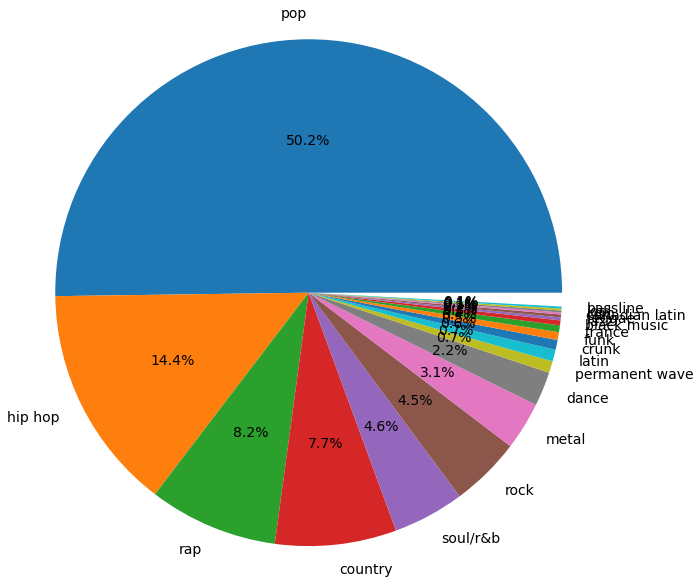

In [32]:
df_genre = songs_df['genre'].value_counts()[:20].sort_values(ascending=False) / len(songs_df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()
# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
# plt.title("Most Popular Genres\n" , bbox={'facecolor':'0.8', 'pad':0})
plt.show()

conclusion from the pie chart:
 pop, rap,hip hop and country are the most popular genres in the billaboard charts, by far from the other genres.
 
we can see that there are a lot of different genres, and we can get rid of some, since a lot of genres here are sub-genres of others.

# Improving the genre feature and get rid of outliers

In [33]:
songs_df['genre']

0            pop
1        country
2            pop
3            pop
4        hip hop
          ...   
1598         pop
1599      reggae
1600         rap
1601    soul/r&b
1602         pop
Name: genre, Length: 1603, dtype: object

In [34]:
# ser=songs_df['genre']
# for genre in ser:
# #     if (songs_df['genre']==songs_df['genre'].all())
# #         songs_df.drop(label=genre)
#     if bool([ser.value_counts()<3]):
#             print(genre)
#             ser.drop(labels=genre)
        

In [35]:
songs_df['genre'].unique()

array(['pop', 'country', 'hip hop', 'rap', 'trance', 'rock', 'dance',
       'metal', 'soul/r&b', 'funk', 'permanent wave', 'la indie',
       'black music', 'comic', 'reggae', 'jazz', 'singer-songwriter',
       'orchestral soundtrack', 'latin', 'lullaby', 'ccm', 'cartoon',
       'deep latin christian', 'crunk', 'afrofuturism', 'gospel',
       'bounce', 'soca', 'lilith', 'karaoke', 'canadian latin', 'fake',
       'idol', 'bassline'], dtype=object)

In [36]:
songs_df['genre'].value_counts()

pop                      805
hip hop                  231
rap                      132
country                  124
soul/r&b                  73
rock                      72
metal                     49
dance                     35
permanent wave            12
latin                     12
crunk                     10
funk                       8
trance                     7
black music                5
jazz                       3
reggae                     3
canadian latin             2
ccm                        2
idol                       2
bassline                   2
gospel                     1
lullaby                    1
fake                       1
singer-songwriter          1
soca                       1
deep latin christian       1
lilith                     1
afrofuturism               1
karaoke                    1
cartoon                    1
comic                      1
bounce                     1
orchestral soundtrack      1
la indie                   1
Name: genre, d

## Reducing Genres

I built a function that drop genres that belong to less than 3 songs from the genre cloumn. 

we will also use those functions later on the dependent train set (Y_train), in order to remove another outliers  

In [37]:
# find all the outliers keys' of genre feature, i.e the keys of the genres that belongs to less than 3 songs
def find_position(ser,specific_genre):
    for key,genre in ser.iteritems():
        if(genre==specific_genre):
            return(key) 

In [38]:
# makes a list of all those keys
def drop_genre(ser,lst,num):
    for genre,count in ser.value_counts().iteritems():
        if bool(count<num):
    #         list.append(genre)
              pos=find_position(ser,genre)
              lst.append(pos)
    return lst  

In [39]:
#two lists, because we will need do double check the genre column to see if there are more outliers
list=[]
list2=[]


In [40]:
list=drop_genre(songs_df['genre'],list,5)

In [41]:
songs_df['genre'][815]

'pop'

In [42]:
list

[480,
 383,
 1232,
 914,
 1320,
 1387,
 1045,
 575,
 1312,
 485,
 1072,
 1011,
 1073,
 1019,
 1129,
 929,
 350,
 1058,
 546,
 305]

In [43]:
songs_df['genre']=songs_df['genre'].drop(list)

In [44]:
list2=drop_genre(songs_df['genre'],list2,5)
songs_df['genre']=songs_df['genre'].drop(list2)

In [45]:
# songs_df['genre']=songs_df['genre'].drop(list2)

In [46]:
songs_df['genre'].value_counts()

pop               805
hip hop           231
rap               132
country           124
soul/r&b           73
rock               72
metal              49
dance              35
permanent wave     12
latin              12
crunk              10
funk                8
trance              7
black music         5
jazz                1
reggae              1
Name: genre, dtype: int64

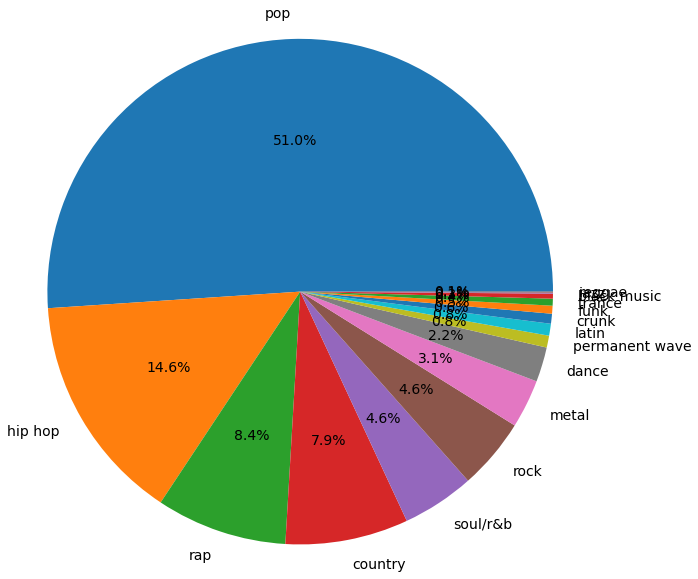

In [47]:
songs_df=songs_df.dropna()
df_genre = songs_df['genre'].value_counts()[:20].sort_values(ascending=False) / len(songs_df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()
# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
# plt.title("Most Popular Genres\n" , bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [48]:
# now , we need do drop all the rows with the null values. this accured because we deleted the outliers in the genres
songs_df=songs_df.dropna()

In [49]:
songs_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,popularity,rank
0,0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,...,audio_features,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,pop,82,1
1,1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,...,audio_features,11EX5yhxr9Ihl3IN1asrfK,spotify:track:11EX5yhxr9Ihl3IN1asrfK,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4,country,72,2
2,2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,...,audio_features,4HlFJV71xXKIGcU3kRyttv,spotify:track:4HlFJV71xXKIGcU3kRyttv,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4,pop,77,3
3,3,0.788,0.753,0,-3.710,1,0.0536,0.00380,0.000000,0.1800,...,audio_features,6KOEK6SeCEZOQkLj5M1PxH,spotify:track:6KOEK6SeCEZOQkLj5M1PxH,https://api.spotify.com/v1/tracks/6KOEK6SeCEZO...,https://api.spotify.com/v1/audio-analysis/6KOE...,234653,4,pop,88,4
4,4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,...,audio_features,1bM50INir8voAkVoKuvEUI,spotify:track:1bM50INir8voAkVoKuvEUI,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4,hip hop,83,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,0.777,0.820,1,-3.211,0,0.0471,0.00505,0.000026,0.1420,...,audio_features,5myYDbAurm1CW038qd4gL2,spotify:track:5myYDbAurm1CW038qd4gL2,https://api.spotify.com/v1/tracks/5myYDbAurm1C...,https://api.spotify.com/v1/audio-analysis/5myY...,208133,4,pop,41,96
1599,1599,0.738,0.983,5,-4.374,0,0.0852,0.03760,0.000006,0.1830,...,audio_features,383B8ksM58jbV3HbiRJo0K,spotify:track:383B8ksM58jbV3HbiRJo0K,https://api.spotify.com/v1/tracks/383B8ksM58jb...,https://api.spotify.com/v1/audio-analysis/383B...,235760,4,reggae,59,97
1600,1600,0.610,0.431,0,-6.730,1,0.2940,0.03000,0.000000,0.0990,...,audio_features,5lrOsw7J8R7shum7A4j36t,spotify:track:5lrOsw7J8R7shum7A4j36t,https://api.spotify.com/v1/tracks/5lrOsw7J8R7s...,https://api.spotify.com/v1/audio-analysis/5lrO...,215973,3,rap,62,98
1601,1601,0.563,0.402,9,-10.496,1,0.0668,0.25200,0.000002,0.0886,...,audio_features,22NLm3IIR9NLG0cUYtmHMW,spotify:track:22NLm3IIR9NLG0cUYtmHMW,https://api.spotify.com/v1/tracks/22NLm3IIR9NL...,https://api.spotify.com/v1/audio-analysis/22NL...,310520,4,soul/r&b,62,99


# dropping unnecessary features

In [50]:
songs_df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'genre', 'popularity', 'rank'],
      dtype='object')

In [51]:
#type has  only one value -  audio features , so we will drop it
songs_df['type']

0       audio_features
1       audio_features
2       audio_features
3       audio_features
4       audio_features
             ...      
1598    audio_features
1599    audio_features
1600    audio_features
1601    audio_features
1602    audio_features
Name: type, Length: 1577, dtype: object

In [52]:
#'id', 'uri', 'track_href', 'analysis_url' aren't linked to the song genre at all, so we can drop them 

In [53]:
songs_df=songs_df.drop(columns=['type','id', 'uri','track_href','analysis_url'])

# Dealing with Catagorials

the only Catagorial feature is out target variable - genre

since the catagorial column 'genre' is  Nominal , i.e there is no particular order between different values of genres and also this this is not a binary (yes/no) column, we will use getDummies function

In [54]:
#save a copy before we changed the catagorials
songs_df_copy=songs_df.copy()

In [55]:
songs_df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'genre',
       'popularity', 'rank'],
      dtype='object')

In [56]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False)
# ohe.fit_transform(songs_df[['genre']])

songs_df['genre']

0            pop
1        country
2            pop
3            pop
4        hip hop
          ...   
1598         pop
1599      reggae
1600         rap
1601    soul/r&b
1602         pop
Name: genre, Length: 1577, dtype: object

In [57]:
dummies_genre=pd.get_dummies(songs_df['genre'])
merged_genre = pd.concat([songs_df,dummies_genre],axis='columns')
songs_df = merged_genre
songs_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,jazz,latin,metal,permanent wave,pop,rap,reggae,rock,soul/r&b,trance
0,0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,...,0,0,0,0,1,0,0,0,0,0
1,1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,...,0,0,0,0,0,0,0,0,0,0
2,2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,...,0,0,0,0,1,0,0,0,0,0
3,3,0.788,0.753,0,-3.710,1,0.0536,0.00380,0.000000,0.1800,...,0,0,0,0,1,0,0,0,0,0
4,4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,0.777,0.820,1,-3.211,0,0.0471,0.00505,0.000026,0.1420,...,0,0,0,0,1,0,0,0,0,0
1599,1599,0.738,0.983,5,-4.374,0,0.0852,0.03760,0.000006,0.1830,...,0,0,0,0,0,0,1,0,0,0
1600,1600,0.610,0.431,0,-6.730,1,0.2940,0.03000,0.000000,0.0990,...,0,0,0,0,0,1,0,0,0,0
1601,1601,0.563,0.402,9,-10.496,1,0.0668,0.25200,0.000002,0.0886,...,0,0,0,0,0,0,0,0,1,0


In [58]:
songs_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,jazz,latin,metal,permanent wave,pop,rap,reggae,rock,soul/r&b,trance
0,0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,...,0,0,0,0,1,0,0,0,0,0
1,1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,...,0,0,0,0,0,0,0,0,0,0
2,2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,...,0,0,0,0,1,0,0,0,0,0
3,3,0.788,0.753,0,-3.710,1,0.0536,0.00380,0.000000,0.1800,...,0,0,0,0,1,0,0,0,0,0
4,4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,0.777,0.820,1,-3.211,0,0.0471,0.00505,0.000026,0.1420,...,0,0,0,0,1,0,0,0,0,0
1599,1599,0.738,0.983,5,-4.374,0,0.0852,0.03760,0.000006,0.1830,...,0,0,0,0,0,0,1,0,0,0
1600,1600,0.610,0.431,0,-6.730,1,0.2940,0.03000,0.000000,0.0990,...,0,0,0,0,0,1,0,0,0,0
1601,1601,0.563,0.402,9,-10.496,1,0.0668,0.25200,0.000002,0.0886,...,0,0,0,0,0,0,0,0,1,0


In [59]:
songs_df['genre']

0            pop
1        country
2            pop
3            pop
4        hip hop
          ...   
1598         pop
1599      reggae
1600         rap
1601    soul/r&b
1602         pop
Name: genre, Length: 1577, dtype: object

In [60]:
# X1=songs_df.drop(['genre'],axis=1)
# y1=songs_df['genre']                 
# target_encode_multiclass(X1,y1)

# train test split

In [61]:
X = songs_df.drop(['genre'],axis=1)
Y = songs_df['genre']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [63]:
Y_train.value_counts()

pop               603
hip hop           176
rap               101
country            92
rock               53
soul/r&b           52
metal              38
dance              26
permanent wave      9
latin               8
trance              7
crunk               6
funk                5
black music         4
reggae              1
jazz                1
Name: genre, dtype: int64

as we can see, there are genres that only belong to 1 or 2 songs in Y_train, so in order to take care of imbalaned data (smote) and doing cross validation, we need to take care of these values:

we will use find_position(ser,specific_genre) and drop_genre(ser,lst) functions (again) from the "Improving the genre feature and get rid of outliers" section

this time, we are taking the genres that belong to at least 5 songs, so that SMOTE nethod will work right ( n_samples, i.e, number of samples in each class in genre should be at least 5 - because we want k_neighbors=5)

In [64]:
# # df.iloc[1:3, 0:3]
# X_train.iloc[0,20]

In [67]:
######################## lst=drop_genre(Y_train,lst,3)

In [68]:
# #dropping first time
# X_train=drop_X_train(lst,X_train)

[]

In [70]:
########################### Y_train=Y_train.drop(lst)


In [71]:
# X_train_standardized=X_train_standardized.drop(lst)

In [72]:
################ new_lst=drop_genre(Y_train,new_lst,3)


[]

In [74]:
#dropping first time
############################ X_train=drop_colX(X_train,new_lst)

In [75]:
###################### Y_train=Y_train.drop(new_lst)

[]

In [77]:
Y_train

586        pop
61         rap
201    hip hop
614        pop
638    hip hop
        ...   
72         pop
108        pop
272        rap
440        pop
104        rap
Name: genre, Length: 636, dtype: object

In [78]:
X_train

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,dance,hip hop,jazz,latin,permanent wave,pop,rap,rock,soul/r&b,trance
586,586,0.685,0.466,0,-9.074,1,0.0304,0.794000,0.000002,0.0915,...,0,0,0,0,0,1,0,0,0,0
61,61,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,...,0,0,0,0,0,0,1,0,0,0
201,201,0.926,0.666,11,-5.314,1,0.2440,0.061100,0.000000,0.1230,...,0,1,0,0,0,0,0,0,0,0
614,614,0.602,0.843,0,-4.831,1,0.0593,0.000688,0.000053,0.0682,...,0,0,0,0,0,1,0,0,0,0
638,638,0.739,0.872,11,-4.059,0,0.3330,0.021700,0.000000,0.2600,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,0.905,0.389,8,-14.505,1,0.3320,0.740000,0.162000,0.1060,...,0,0,0,0,0,1,0,0,0,0
108,108,0.851,0.541,0,-6.825,1,0.0505,0.568000,0.000000,0.1300,...,0,0,0,0,0,1,0,0,0,0
272,272,0.839,0.810,5,-5.274,0,0.0568,0.501000,0.000000,0.1170,...,0,0,0,0,0,0,1,0,0,0
440,440,0.407,0.725,5,-5.346,0,0.1880,0.014100,0.000002,0.3060,...,0,0,0,0,0,1,0,0,0,0


# Scaling

The most common techniques of feature scaling are Normalization and Standardization. Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless.

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [65]:
X_train=X_train.drop('Unnamed: 0',axis=1)

In [66]:
X_test=X_test.drop('Unnamed: 0',axis=1)

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [68]:
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

In [69]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

In [70]:
numerical_features=['danceability','energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'popularity', 'rank']

In [71]:
# scaler_standard.fit(X_train[numerical_features])
# X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# # the scaling is with the the same fitted scaler (by the train data)
# X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

In [469]:
# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])

In [72]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,rank
mean,0.666648,0.686100,5.408629,-5.699879,0.617597,0.102159,0.142124,0.005677,0.176828,0.529664,120.993139,229908.369712,3.992386,78.904399,50.027919
std,0.139155,0.156488,3.649972,1.978684,0.486180,0.096046,0.188782,0.046938,0.132639,0.217919,28.428278,40487.977002,0.219559,11.288241,28.990262


In [471]:
print('note: the mean is 0 and std is 1')
X_train_normalized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,rank
mean,0.567912,0.677510,0.498571,0.733599,0.616352,0.139294,0.157241,0.010255,0.178422,0.497646,0.405427,0.232585,0.495283,0.674558,0.503256
std,0.189703,0.171984,0.326700,0.150413,0.486656,0.167484,0.204873,0.070612,0.147423,0.236208,0.195666,0.067522,0.092947,0.173853,0.292392


# Visualisation

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'speechiness'}>]], dtype=object)

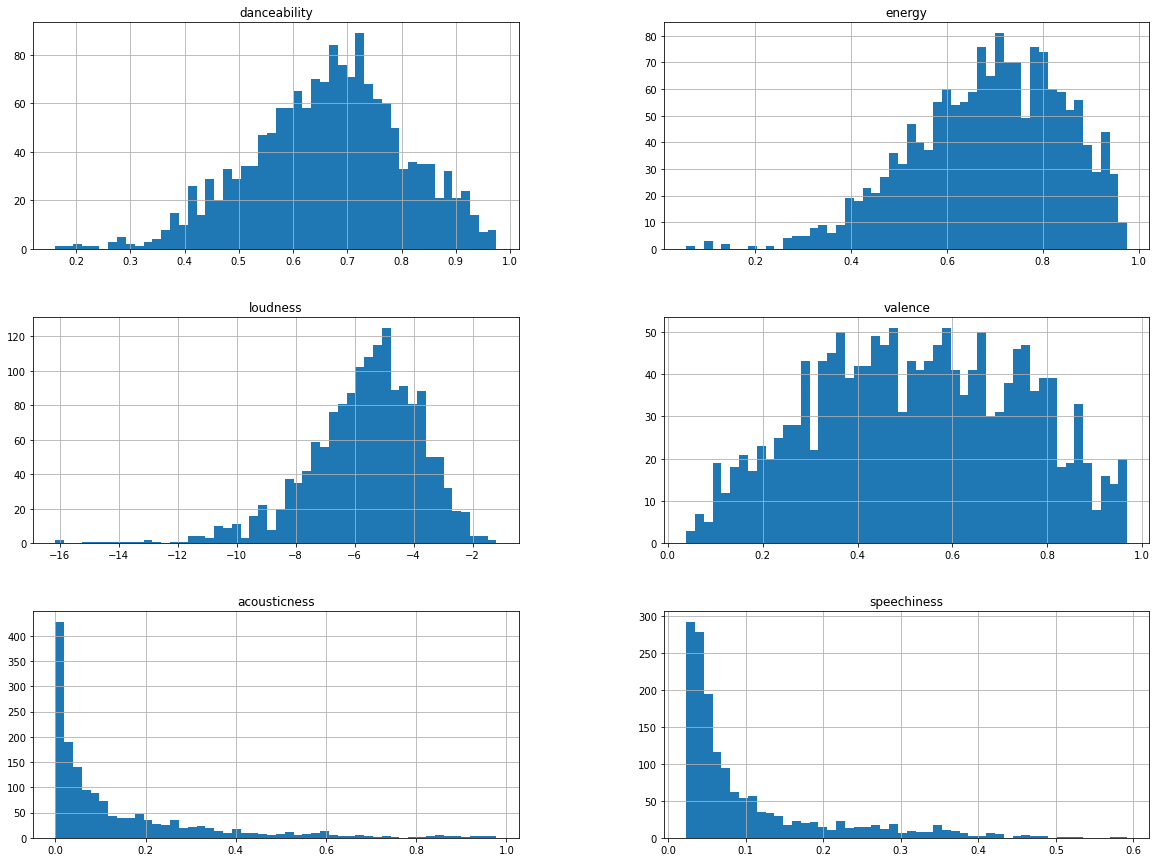

In [472]:
#let's take a look at the numeric attributes histograma:
atttibutes_hist = songs_df[["danceability", 'energy', 'loudness', 'valence','acousticness','speechiness']].hist(bins=50, figsize=(20,15))
atttibutes_hist

In [473]:
# #Finding out the skew for each attribute
# skew=train_numeric.skew()
# print(skew)

In [474]:
Y

0      hip hop
1          rap
2          pop
3          pop
4          rap
        ...   
855    country
856       rock
857    country
858    country
859    hip hop
Name: genre, Length: 848, dtype: object

In [475]:
X_train.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'popularity', 'rank', 'black music',
       'country', 'dance', 'hip hop', 'jazz', 'latin', 'permanent wave', 'pop',
       'rap', 'rock', 'soul/r&b', 'trance'],
      dtype='object')

In [476]:
train_numeric=X_train[numerical_features]

## Pearson's Correlation Matrix

Correlation between the output observations and the input features is very important and such features should be retained. However, if two or more than two features are mutually correlated, they convey redundant information to the model and hence only one of the correlated features should be retained to reduce the number of features.

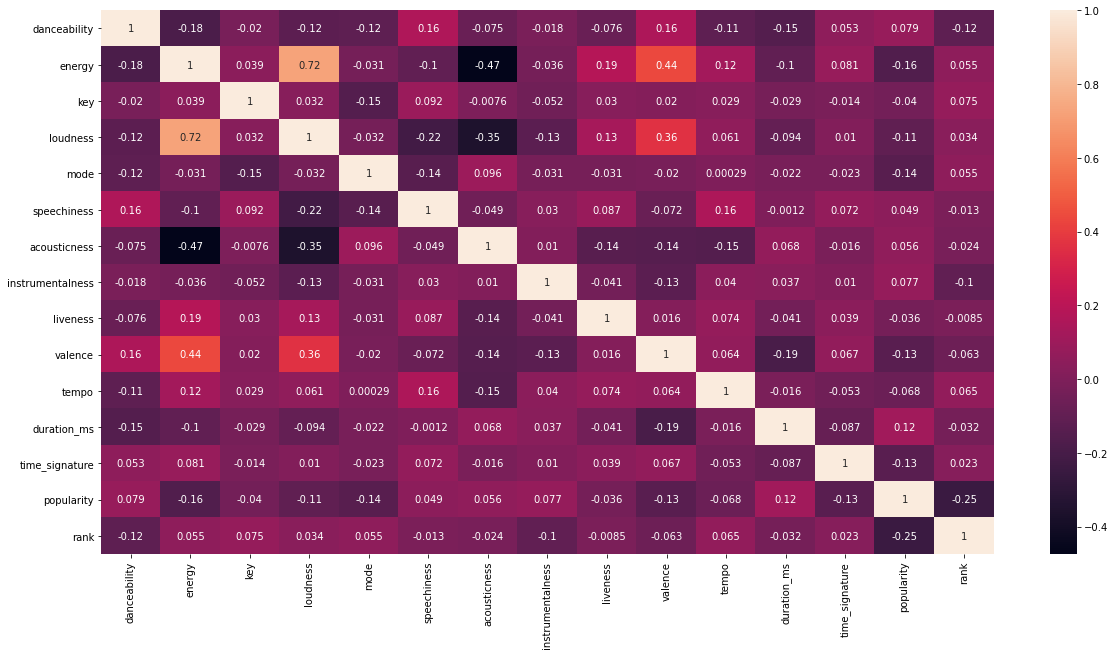

In [477]:
#checking correlation between numericals
plt.figure(figsize=(20,10))
sns.heatmap(train_numeric.corr(),annot=True);

features that have high correlation:
    
    *loudness and energy  - the more a song is loud, it has more energy 
    
    * popularity and rank - the more the song is popular, the more its' rank is high
    
     * danceability  and speechiness - 
    
    * acousticness and mode - 
    
   * acousticness and danceability 
    
   *acousticness and energy 
   
   * loudness and valance - the more a song is loud, its' valance is high ( it is more happy and cheerful)
   
   some of these correlations are very intuitive

In [ ]:
# #checking correlation between numericals
# plt.figure(figsize=(20,10))
# sns.heatmap((corr_matrix > 0.2)|(corr_matrix< -0.2),annot=True);

In [ ]:
# train=train_numeric.copy()

In [ ]:
# train_numeric

In [ ]:
# corr_matrix=songs_df.corr()

<!--  looking only at the high correlated features (high correlation to one another), and check out how they are correlated to the different genres -->

In [ ]:
# high_corr_add=(corr_matrix > 0.2)|(corr_matrix< -0.2)

In [ ]:
# df=high_corr_add.iloc[15:60,0:15]

In [ ]:
# df[df['danceability']==True]

In [ ]:
# # values of 1.0 - high correlation
# high_corr_add[high_corr_add==True]

In [ ]:
# fig, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(high_corr.corr(),annot=True)
# sns.set(font_scale=1)

looking at the  numeric features with the highest correlationM

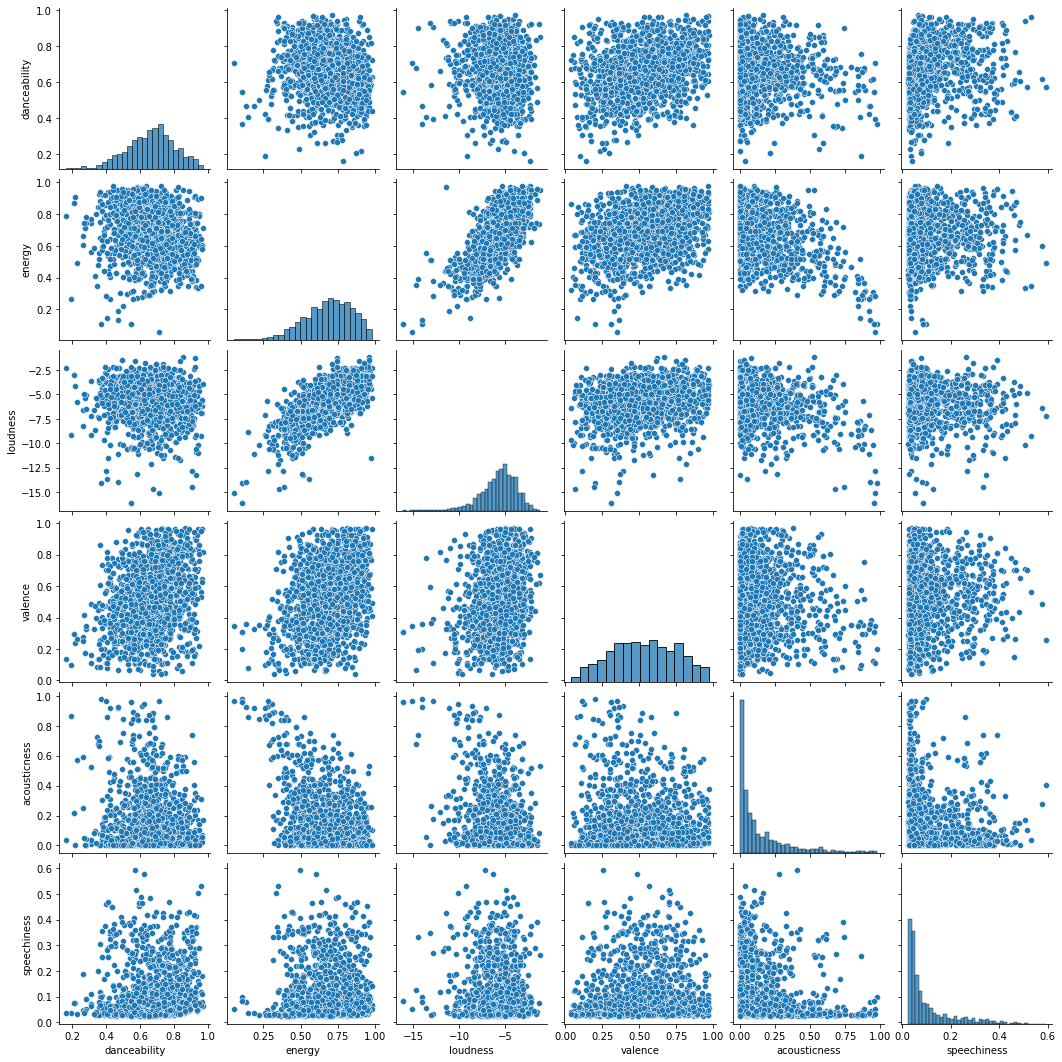

In [478]:

sns.pairplot(songs_df[["danceability", 'energy', 'loudness', 'valence','acousticness','speechiness']])

highly correlated and linear features: 
   * acousticness and energy
   * loudness and energy
   * energy and valance 
 
 less:
   * acousticness and loudness
   * energy and dancability

conclusion: energy is an important feature, we should keep it and might concider removing features that are highly correlated to it but less important.


'loudness' and 'acousticness' are highly correlated to 'energy', so we will drop them.

# feature selection alternative -  PCA (Principal Component Analysis) 

PCA (Principal Component Analysis) is a dimensionality reduction method.

Dimensionality reduction removes redundant and highly correlated features in the dataset. 

The input data is centered but not scaled for each feature before applying the SVD.

PCA is most effective when features have a strong correlation to each other, and As highlighted earlier with the Correlation heatmap , some of the numeric features have a strong correlation between them..

Text(0.5, 1.0, 'Data before PCA')

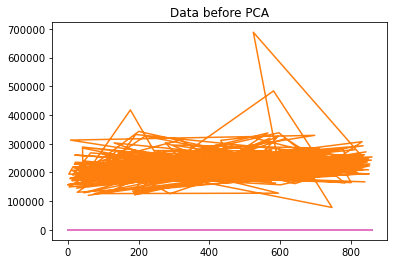

In [389]:
plt.plot(X_train)
plt.title('Data before PCA')

In [479]:
# plt.plot(X_train_standardized)
# plt.title('Data before PCA')

In [480]:
# plt.plot(X_train_normalized)
# plt.title('Data before PCA')

In [481]:
X_train_pca=X_train.copy()
X_test_pca=X_test.copy()


In [482]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

# explained_variance_ratio_ndarray of shape (n_components,)
# Percentage of variance explained by each of the selected components.
explained_variance = pca.explained_variance_ratio_

# n_components: Number of components to keep. if n_components is not set all components are kept
# svd_solver: The solver is selected by a default policy based on X.shape and n_components

# pca = PCA(n_components=0.95)
pca = PCA(n_components = None )
X_reduced = pca.fit_transform(X_train_pca)
print(pca.explained_variance_ratio_)




[9.99998999e-01 5.11785936e-07 4.33096009e-07 4.59615429e-08
 7.55565266e-09 2.12589362e-09 1.65776456e-10 1.34898215e-10
 6.69428910e-11 5.36053973e-11 3.15054176e-11 2.49147004e-11
 2.23550456e-11 2.07794584e-11 1.80275838e-11 1.52062051e-11
 8.57425851e-12 7.50147376e-12 6.12236620e-12 4.35406100e-12
 4.13442838e-12 3.73491465e-12 2.64511774e-12 2.00859756e-12
 1.81283150e-12 2.96962034e-13 9.98401084e-33]


In [483]:
pca = PCA(n_components=5)
# transform on both , fit only on the train
X_train_pca= pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

pca.explained_variance_ratio_

array([9.99998999e-01, 5.11785936e-07, 4.33096009e-07, 4.59615429e-08,
       7.55565266e-09])

The lower value in the numpy array denotes low variance.

In [484]:
df_=pd.DataFrame(X_train_pca)

In [485]:
df_

,0,1,2,3,4
0,-57002.954639,-54.808716,-20.552492,4.272490,5.228305
1,-4855.955982,8.196554,-6.621188,-9.222203,5.475773
2,123014.044868,-34.355877,24.152116,7.450722,-6.136017
3,7851.044516,-6.200101,9.464055,-12.396498,5.281106
4,18610.044231,1.994355,-31.161545,-12.536264,-5.660146
...,...,...,...,...,...
631,-26992.956160,17.367397,-11.489690,-11.847843,-2.199797
632,15409.045090,-35.327789,20.763488,-2.546662,5.084451
633,-10866.956637,29.423809,-7.113862,-6.146721,0.733142
634,27131.043032,40.895872,62.616677,-0.632552,0.712020


Variance is the change in prediction accuracy of ML model between training data and test data.
High variance would cause an algorithm to model the noise in the training set. This is most commonly referred to as overfitting.
this is why it's good that we have got a low variance

Text(0.5, 1.0, 'Data after PCA')

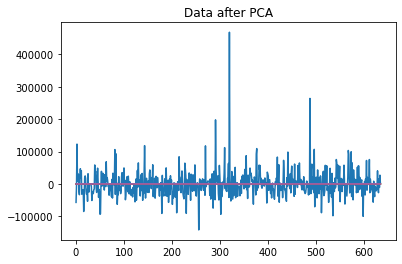

In [486]:
plt.plot(X_train_pca)
plt.title('Data after PCA')

In [487]:
 n_components = None 

# dealing with unbalanced data

NOTE: THE TEST SET SHOULD STAY UNBALANCED

note: we cant use the data after upsample for testing our model because it is balanced compared to the TEST SET which is unbalanced. more over, Even if we use the training data before over-sampling, so the ratio is the same, there is a risk of making a mistake due to over-fitting.

The solution is to use cross-validation and only after the split do over-sampling!

so we will do the over sampling during the model evaluation

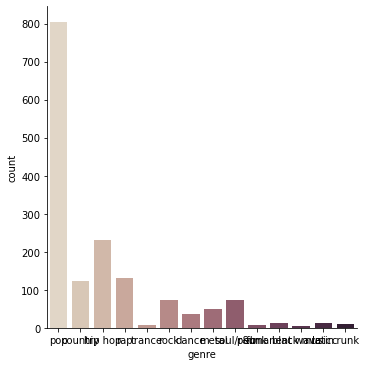

In [488]:
# showing that our data (for example- the genre column), is imbalanced
sns.catplot(x="genre", kind="count", palette="ch:.25", data=songs_df)

In [489]:
X_train_standardized=X_train_standardized.dropna()

In [490]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# import the class
from sklearn.linear_model import LogisticRegression


In [491]:
from sklearn.model_selection import learning_curve 
#implementation
# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10,scoring='roc_auc', n_jobs=-1,train_sizes=linspace(0.1, 1.0, 5))  

In [492]:
Y_train.shape

(636,)

In [493]:
from imblearn.over_sampling import RandomOverSampler

In [494]:
# random_state- Control the randomization of the algorithm.
#sampling_strategy is float only if the target is binary
#out target is nominal and not binary so we will define sampling_strategy with string - When str, specify the class targeted by the resampling. 
ros = RandomOverSampler(sampling_strategy='auto',random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train_standardized, Y_train)

from collections import Counter

# print(sorted(Counter(y_resampled).items()))

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({'pop': 339, 'rap': 339, 'hip hop': 339, 'permanent wave': 339, 'rock': 339, 'soul/r&b': 339, 'country': 339, 'black music': 339, 'dance': 339, 'latin': 339, 'trance': 339, 'jazz': 339})


In [495]:
ros.sampling_strategy_

OrderedDict([('black music', 337),
             ('country', 276),
             ('dance', 322),
             ('hip hop', 249),
             ('jazz', 336),
             ('latin', 332),
             ('permanent wave', 337),
             ('rap', 281),
             ('rock', 311),
             ('soul/r&b', 316),
             ('trance', 335)])

In [496]:
ros.sample_indices_

array([  0,   1,   2, ..., 330, 169, 330], dtype=int64)

In [497]:
X_resampled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,dance,hip hop,jazz,latin,permanent wave,pop,rap,rock,soul/r&b,trance
0,0.035784,-1.313786,-1.527280,-1.728263,0.788954,-0.756702,3.251100,-0.145253,-0.639219,-0.705126,...,0,0,0,0,0,1,0,0,0,0
1,0.116204,0.586319,-1.527280,1.190101,0.788954,-0.661104,0.203380,-0.041801,-0.683350,0.220871,...,0,0,0,0,0,0,1,0,0,0
2,1.973906,-0.029931,1.536037,0.239291,0.788954,1.487235,-0.459321,-0.145341,-0.371886,-1.561673,...,0,1,0,0,0,0,0,0,0,0
3,-0.631702,1.106280,-1.527280,0.492038,0.788954,-0.453098,-0.765167,-0.143104,-0.836960,0.095861,...,0,0,0,0,0,1,0,0,0,0
4,0.470052,1.292439,1.536037,0.896015,-1.267500,2.422209,-0.658790,-0.145341,0.790801,0.827398,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,-0.583450,-0.363734,-0.970313,1.069746,0.788954,-0.776662,0.380573,-0.145179,-0.083336,-0.478257,...,0,0,0,0,0,0,0,0,0,1
4064,-0.679954,0.380902,0.979071,0.879270,0.788954,0.510240,0.446388,-0.145341,1.342440,0.091231,...,0,0,0,0,0,0,0,0,0,1
4065,-0.583450,-0.363734,-0.970313,1.069746,0.788954,-0.776662,0.380573,-0.145179,-0.083336,-0.478257,...,0,0,0,0,0,0,0,0,0,1
4066,-0.583450,-0.363734,-0.970313,1.069746,0.788954,-0.776662,0.380573,-0.145179,-0.083336,-0.478257,...,0,0,0,0,0,0,0,0,0,1


# Dummy model

we chose strategy="stratified" , since it is more sophisticated than strategy="most_frequent"

In [397]:
from sklearn.dummy import DummyClassifier
# defining the strategy
# dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf = DummyClassifier(strategy="stratified")

dummy_clf.fit(X_train, Y_train)
#dummy_clf.score(X_train, Y_train)
dummy_clf.predict(X_test)

#accuracy
dummy_clf.score(X_train, Y_train)



0.3191823899371069

# choosing models

In [398]:
# for the models evaluation
def cf_matrix_show(cf_matrix, beta = 4):

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
    precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
    recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    fb_score  = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\nFb Score={:0.3f}".format(
                    accuracy,precision,recall,f1_score, fb_score)

    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stats_text)

How to calculate FN, FP, TN, TP :

FN: The False-negative value for a class will be the sum of values of corresponding rows except for the TP value.

FP: The False-positive value for a class will be the sum of values of the corresponding column except for the TP value.

TN: The True Negative value for a class will be the sum of values of all columns and rows except the values of that class that we are calculating the values for.

TP: The True positive value is where the actual value and predicted value are the same.

In [399]:
from imblearn.over_sampling import RandomOverSampler

In [400]:
# random_state- Control the randomization of the algorithm.
#sampling_strategy is float only if the target is binary
#out target is nominal and not binary so we will define sampling_strategy with string - When str, specify the class targeted by the resampling. 
ros = RandomOverSampler(sampling_strategy='auto',random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train_normalized, Y_train)

from collections import Counter

# print(sorted(Counter(y_resampled).items()))

print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({'pop': 339, 'rap': 339, 'hip hop': 339, 'permanent wave': 339, 'rock': 339, 'soul/r&b': 339, 'country': 339, 'black music': 339, 'dance': 339, 'latin': 339, 'trance': 339, 'jazz': 339})


In [401]:
ros.sampling_strategy_

OrderedDict([('black music', 337),
             ('country', 276),
             ('dance', 322),
             ('hip hop', 249),
             ('jazz', 336),
             ('latin', 332),
             ('permanent wave', 337),
             ('rap', 281),
             ('rock', 311),
             ('soul/r&b', 316),
             ('trance', 335)])

## knn

In [498]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

In [499]:
k_mean_scores = []
k_std_scores = []

In [500]:
#specify tuning parameters
# we chose brute force, since our data is small: For small data sets ( less than 30 or so),  is comparable to , and brute force algorithms can be more efficient than a tree-based approach. 
knn = KNeighborsClassifier(n_neighbors=3,algorithm="brute")

# Fit the model with data (aka "model training")
knn.fit(X_train_standardized,Y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [501]:
Y_train.value_counts()

pop               339
hip hop            90
country            63
rap                58
rock               28
soul/r&b           23
dance              17
latin               7
trance              4
jazz                3
black music         2
permanent wave      2
Name: genre, dtype: int64

In [502]:
scores = cross_val_score(knn, X_train_standardized, Y_train,cv=2, scoring='accuracy')
# , cv=5
k_mean_scores.append(scores.mean())
k_std_scores.append(scores.std())

d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}
# Ks = pd.DataFrame(data = d, index=k_range)

In [503]:
#accuracy
scores

array([0.99371069, 0.99056604])

In [511]:
#specify tuning parameters
# we chose brute force, since our data is small: For small data sets ( less than 30 or so),  is comparable to , and brute force algorithms can be more efficient than a tree-based approach. 
knn = KNeighborsClassifier(n_neighbors=5,algorithm="brute")

# Fit the model with data (aka "model training")
knn.fit(X_train_standardized,Y_train)

KNeighborsClassifier(algorithm='brute')

In [512]:
del list

NameError: name 'list' is not defined

Text(0, 0.5, 'Testing Accuracy')

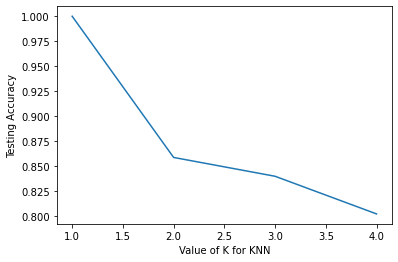

In [518]:
# try K=1 through K=30 and plot testing accuracy
k_range = list(range(1, 5))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_standardized, Y_train)
    y_pred = knn.predict(X_train_standardized)
    scores.append(metrics.accuracy_score(Y_train, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [519]:
# max_score = max(scores)
# best_K = scores.index(max(scores))+1

# print("the first k value with best score is " + str(best_K) + " with accuracy of " + str(max_score))

In [520]:
k_std_scores

[0.0015723270440251569, 0.012578616352201255, 0.012578616352201255]

In [521]:
scores = cross_val_score(knn, X_train_standardized, Y_train,cv=2, scoring='accuracy')

# k_range=list(range(1, 10))
k_mean_scores.append(scores.mean())
k_std_scores.append(scores.std())

d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}
# Ks = pd.DataFrame(data = d, index=k_range)

In [522]:
print("Accuracy of the model for k=5, 2 folds in cross validation and 5 repetitions ")
scores

Accuracy of the model for k=5, 2 folds in cross validation and 5 repetitions 


array([0.67295597, 0.69811321])

the scores aren't so good, we will do cross validation in order to find the most suitable k for the model.

In [416]:
# recall_scores = []
# precision_scores = []
# Fb_scores = []

# for k in k_range:
#     imba_pipeline = make_pipeline(SMOTE(random_state=42), 
#                               KNeighborsClassifier(n_neighbors= k))

    
#     recall = cross_val_score(imba_pipeline, X_train_scaled, y_train, scoring='recall', cv=kf).mean()
#     recall_scores.append(recall)
#     precision = cross_val_score(imba_pipeline, X_train_scaled, y_train, scoring='precision', cv=kf).mean()
#     precision_scores.append(precision)
#     fb_score = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
#     Fb_scores.append(fb_score)

# pd.set_option('display.max_rows', df.shape[0]+1)    
# d = {'Fb': Fb_scores, 'recall': recall_scores, 'precision': precision_scores}
# Ks = pd.DataFrame(data = d, index=k_range)
# Ks

### let's start evaluating the knn model with the most simple metric -  accuracy
we will use the data after the oversampling, because now we are doing cross validation

so now we are doing hyperparameter tuning and trying to find the best hyperparameter, i.e, the best k for our model.

In [523]:
k_range = list(range(1, 31))
k_mean_scores = []
k_std_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=10, scoring='accuracy')
    k_mean_scores.append(scores.mean())
    k_std_scores.append(scores.std())
d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}
Ks = pd.DataFrame(data = d, index=k_range)


# X_resampled, y_resampled

max_score = max(k_mean_scores)
min_std = min(k_std_scores)
best_Ks = Ks[(Ks['k_mean']==max_score) & (Ks['k_std']==min_std)]


In [524]:
Ks

,k_mean,k_std
1,0.991641,0.003515
2,0.984263,0.007069
3,0.980083,0.007266
4,0.970986,0.009664
5,0.964350,0.008052
6,0.959438,0.008818
7,0.956735,0.005299
8,0.951817,0.007797
9,0.947639,0.006966
10,0.942232,0.008459


In [439]:
best_Ks

,k_mean,k_std
1,0.991641,0.003515


In [434]:
max_score

0.9916413502620399

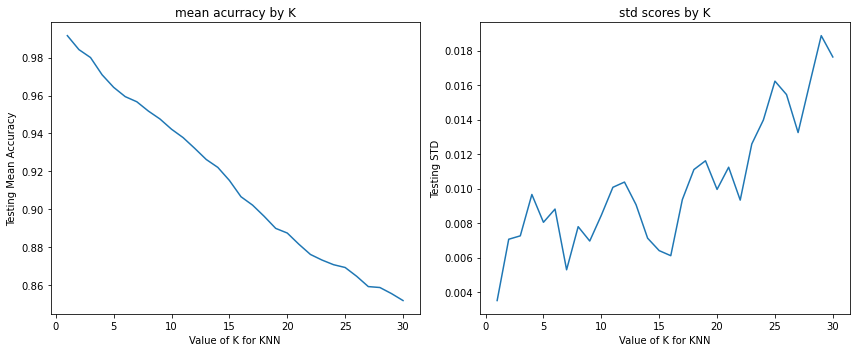

In [441]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
((ax1, ax2)) = ax

ax1.plot(k_range, k_mean_scores)
ax1.set_title('mean acurracy by K')
ax1.set_xlabel('Value of K for KNN')
ax1.set_ylabel('Testing Mean Accuracy')

ax2.plot(k_range, k_std_scores)
ax2.set_title('std scores by K')
ax2.set_xlabel('Value of K for KNN')
ax2.set_ylabel('Testing STD')

plt.tight_layout()
plt.show()

In [442]:
print("best mean acuarracy is: " +str(max_score))
print("the best K's are:")
print(best_Ks)


best mean acuarracy is: 0.9916413502620399
the best K's are:
     k_mean     k_std
1  0.991641  0.003515


as we can see from the results and from the plots, the more the k  is bigger , the accuracy is lower and the std is bigger.
so we will choose k=1 as our k nearest neighbors hyperparameter value.

# LogisticRegression

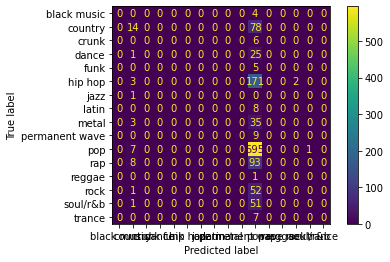

In [79]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

# penalty default is l2 , i.e, Ridge regression, which adds “squared magnitude” of coefficient as penalty term to the loss function.
# we selected multi_class="ovr" since out target variable is a non-binary multiclass - genres 
#If the option chosen is ‘ovr’, then a binary problem is fit for each label.
logreg = LogisticRegression(multi_class="ovr", C=1e12, max_iter=100)

# fit the model with data
model_ovr= logreg.fit(X_train_standardized, Y_train)

plot_confusion_matrix(logreg,X_train_standardized, Y_train )


# # predict the response for new observations
# logreg.predict(X_new)

In [80]:
model_ovr.score(X_train_standardized, Y_train)

0.5152284263959391

Overfitting! let's do cross validation

In [81]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [82]:
cv = RepeatedKFold(n_splits=10, n_repeats=3,random_state=42)

In [83]:
# scores = cross_val_score(knn, X_resampled, y_resampled, cv=cv, scoring='accuracy')

In [84]:
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [85]:
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(logreg,X_train_pca, Y_train, cv=cv, scoring='accuracy', n_jobs=4)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

NameError: name 'X_train_pca' is not defined

In [86]:
songs_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,jazz,latin,metal,permanent wave,pop,rap,reggae,rock,soul/r&b,trance
0,0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,...,0,0,0,0,1,0,0,0,0,0
1,1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,...,0,0,0,0,0,0,0,0,0,0
2,2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,...,0,0,0,0,1,0,0,0,0,0
3,3,0.788,0.753,0,-3.710,1,0.0536,0.00380,0.000000,0.1800,...,0,0,0,0,1,0,0,0,0,0
4,4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,0.777,0.820,1,-3.211,0,0.0471,0.00505,0.000026,0.1420,...,0,0,0,0,1,0,0,0,0,0
1599,1599,0.738,0.983,5,-4.374,0,0.0852,0.03760,0.000006,0.1830,...,0,0,0,0,0,0,1,0,0,0
1600,1600,0.610,0.431,0,-6.730,1,0.2940,0.03000,0.000000,0.0990,...,0,0,0,0,0,1,0,0,0,0
1601,1601,0.563,0.402,9,-10.496,1,0.0668,0.25200,0.000002,0.0886,...,0,0,0,0,0,0,0,0,1,0


as we can see, accuracy isn't good.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [525]:
X_train_pca, X_test_pca

array([[-5.70029546e+04, -5.48087157e+01, -2.05524918e+01,
         4.27248979e+00,  5.22830464e+00],
       [-4.85595598e+03,  8.19655409e+00, -6.62118785e+00,
        -9.22220295e+00,  5.47577310e+00],
       [ 1.23014045e+05, -3.43558770e+01,  2.41521160e+01,
         7.45072215e+00, -6.13601696e+00],
       ...,
       [-1.08669566e+04,  2.94238094e+01, -7.11386194e+00,
        -6.14672113e+00,  7.33141716e-01],
       [ 2.71310430e+04,  4.08958723e+01,  6.26166773e+01,
        -6.32551789e-01,  7.12019899e-01],
       [ 1.30404507e+03, -3.26706890e+01,  3.61167380e+01,
        -4.77707021e+00, -2.86301975e+00]])

In [527]:
train_img=X_train.copy()
test_img=X_test.copy()

In [528]:
pca = PCA(.95)

In [529]:
pca.fit(X_train)

PCA(n_components=0.95)

In [530]:
pca.n_components_

1

In [531]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [532]:
#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [533]:
#Training the model on the data, storing the information learned from the data
#Model is learning the relationship between x (digits) and y (labels)

logisticRegr.fit(train_img, Y_train)

LogisticRegression()

In [77]:
 from sklearn.metrics import roc_auc_score

In [78]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(logisticRegr,X_resampled, y_resampled, cv=cv, scoring='roc_auc', n_jobs=4)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

NameError: name 'RepeatedKFold' is not defined

In [541]:
sorted(sklearn.metrics.SCORERS.keys())

NameError: name 'sklearn' is not defined

## DecitionTreeClassifier

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [121]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
clf.score

In [128]:
clf.get_params()


1.0

In [127]:
clf.predict_proba(X_test)


1.0

In [123]:
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

1.0

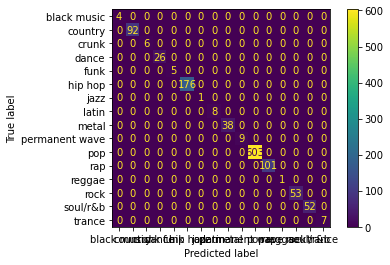

In [130]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clf,X_train_standardized, Y_train )

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=200) # randomly choose
clf.fit(X_train_standardized, Y_train)
 
# Predict on training set
pred_y = clf.predict(X_train_standardized) 

# How's our Fbeta?
print('on train-set scores (over-fitting):')
print('test-set')
print('Fb: '+ str(metrics.fbeta_score(Y_train, pred_y, beta=4)) )
print('recall:' + str(metrics.recall_score(Y_train, pred_y)) )
print('precision:' + str(metrics.precision_score(Y_train, pred_y)) )
print()

# # Predict on training set
# pred_y = clf.predict(X_test_standardized)

# # How's our Fbeta?
# print('on test-set scores (very low):')
# print('Fb: '+ str(metrics.fbeta_score(y_test, pred_y, beta=4)) )
# print('recall:' + str(metrics.recall_score(y_test, pred_y)) )
# print('precision:' + str(metrics.precision_score(y_test, pred_y)) )
# print()

on train-set scores (over-fitting):
test-set


NameError: name 'metrics' is not defined

In [7]:
# training a DescisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train_standardized, Y_train)



NameError: name 'X_train_standardized' is not defined

In [8]:
 y_pred = dtree_model.predict(X_train_standardized)

NameError: name 'dtree_model' is not defined

In [9]:
dtree_model.score(X_train_standardized, Y_train)

NameError: name 'dtree_model' is not defined

In [10]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# k_range=list((1,31))
# for k in k_range:


scores = cross_val_score(dtree_model,X_train_standardized,Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

NameError: name 'dtree_model' is not defined

In [11]:
scores

NameError: name 'scores' is not defined

In [12]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=10, scoring='accuracy')
    k_mean_scores.append(scores.mean())
    k_std_scores.append(scores.std())
d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}
Ks = pd.DataFrame(data = d, index=k_range)

NameError: name 'k_range' is not defined

In [13]:
ros

NameError: name 'ros' is not defined